In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load data

In [18]:
FILE_PATH = "output/"
parameters = ['R_nought','infectious_time','transmission_rate']

In [19]:
lf = ['LF1','LF2']
latent = np.loadtxt(FILE_PATH+"latent_space.out",delimiter=",")
df = pd.DataFrame(data=latent,index=range(0,len(latent)),columns=lf)
for param in parameters:
  y = np.loadtxt(FILE_PATH+"y_{}.out".format(param),delimiter=",")
  df[param] = y[:,0]
df = df[parameters+lf]

## Lower dimensional representation of tree encodings in latent space

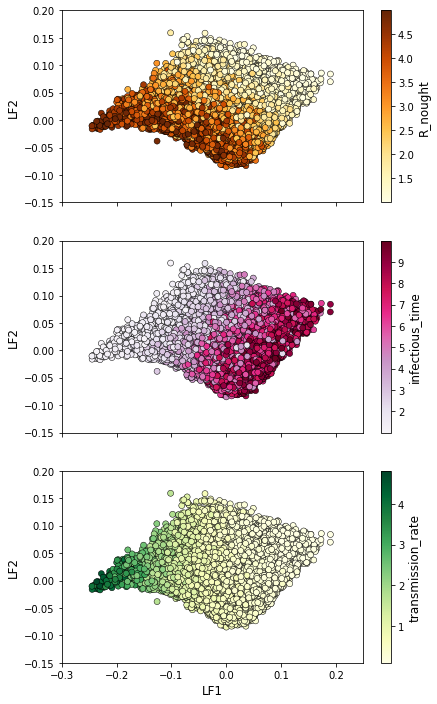

In [10]:
colors = ['YlOrBr', 'PuRd', 'YlGn']
fig, axes = plt.subplots(3,1,sharex=True, sharey=True, figsize=(8,12))

for i,param in enumerate(parameters):

  cmap = sns.color_palette(colors[i], as_cmap=True)
  ax = axes[i]
  sns.scatterplot(data=df, x=lf[0], y=lf[1],hue=param, 
                  palette=cmap, ax=ax, edgecolor="black")
  ax.set_xlim(-0.3,0.25)
  ax.set_ylim(-0.15,0.2)
  ax.set_aspect(1)
  ax.set_xlabel(lf[0], fontsize=12)
  ax.set_ylabel(lf[1], fontsize=12)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(df[param].min(), df[param].max()))
  sm.set_array([])
  ax.get_legend().remove()
  cbar = plt.colorbar(sm,fraction=0.046, pad=0.04, ax=ax)
  cbar.set_label(param, fontsize=12)

pass

## Pairwise relationships between parameters of interest and latent factors 

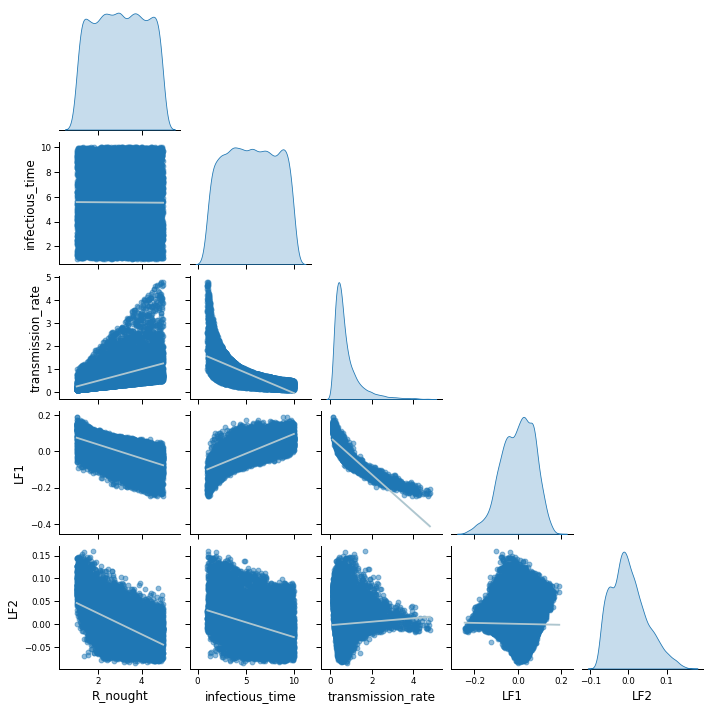

In [11]:
sns.set_context("paper", rc={"axes.labelsize":12})
sns_pp = sns.pairplot(df, kind='reg', diag_kind='kde', height=2, corner=True,
                      plot_kws={'line_kws':{'color':'#aec6cf'},'scatter_kws': {'alpha': 0.5}})
pass